In [1]:
import stockinator as st
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
from mplfinance.original_flavor import candlestick_ohlc

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

In [2]:
tickers = ['SPY', 'VXX']
data = st.get_stock_data(tickers, period='3y', interval='1d')

[*********************100%***********************]  2 of 2 completed


In [3]:
results = []
for t in tickers:
    df = st.calculate_ema(data[t], periods=[21, 89, 233])
    df = st.calculate_mfi(df)
    df = st.calculate_rsi(df)
    df = st.calculate_volume(df)
    results.append(df)

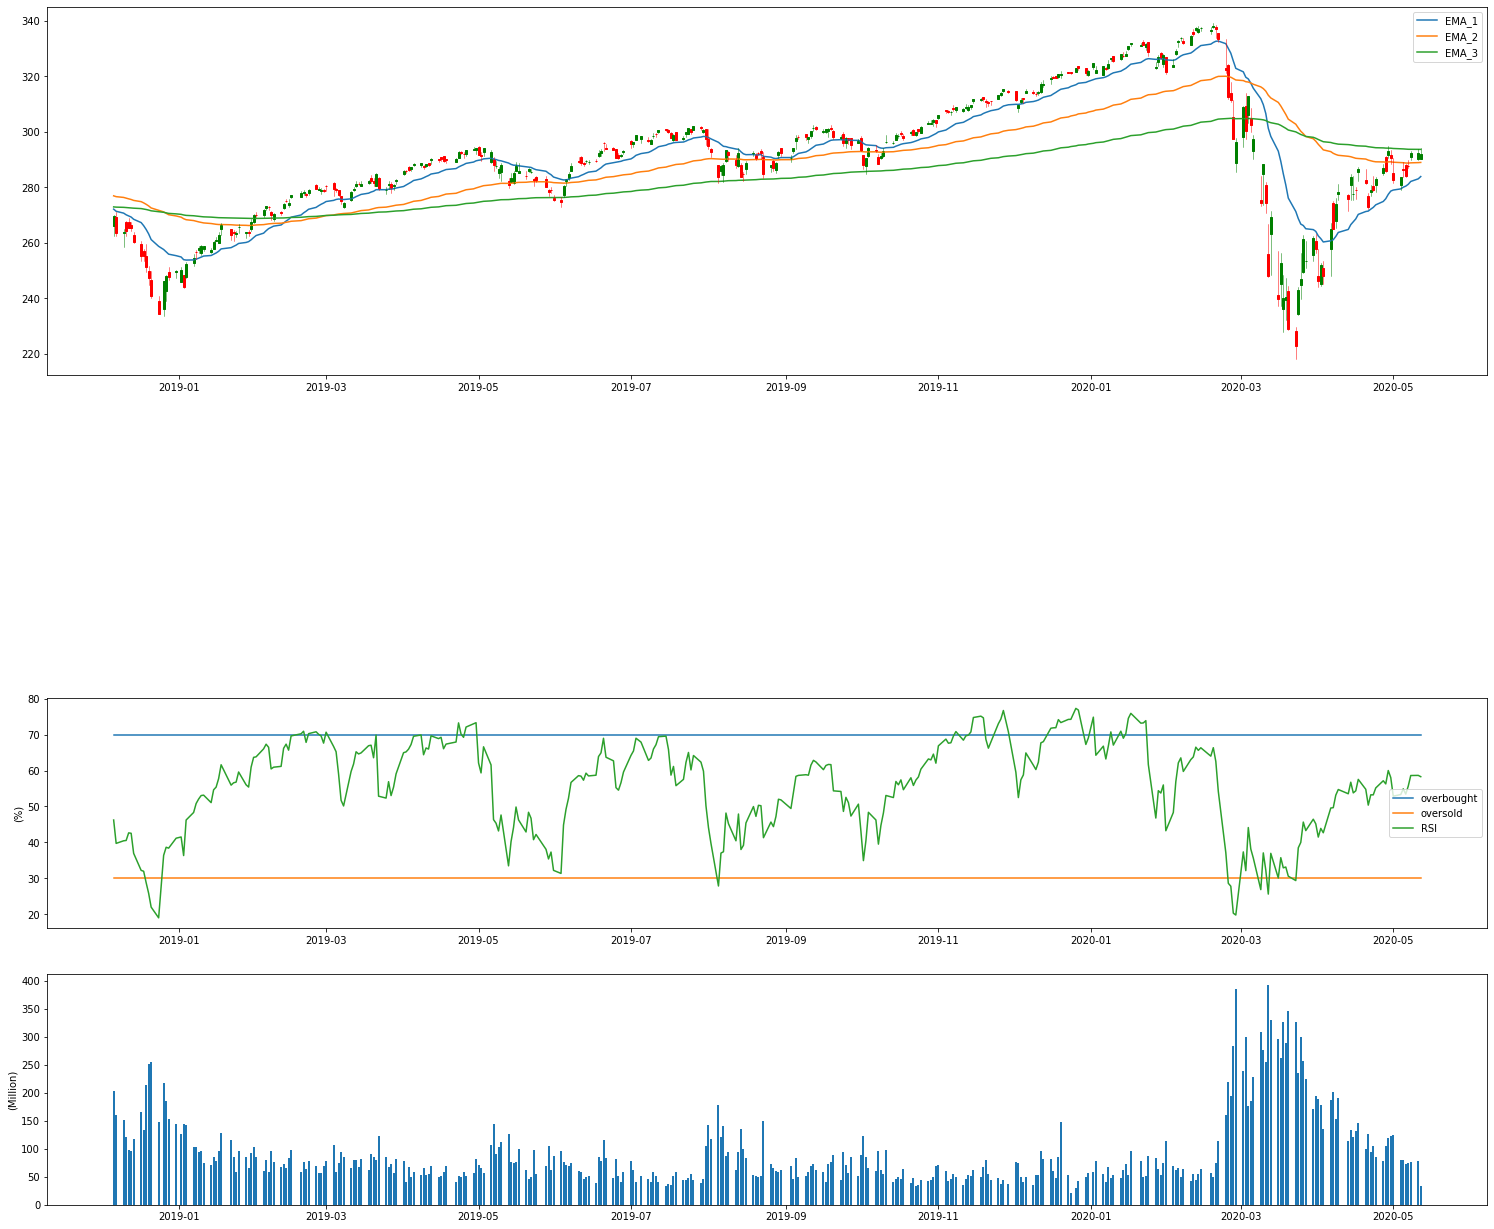

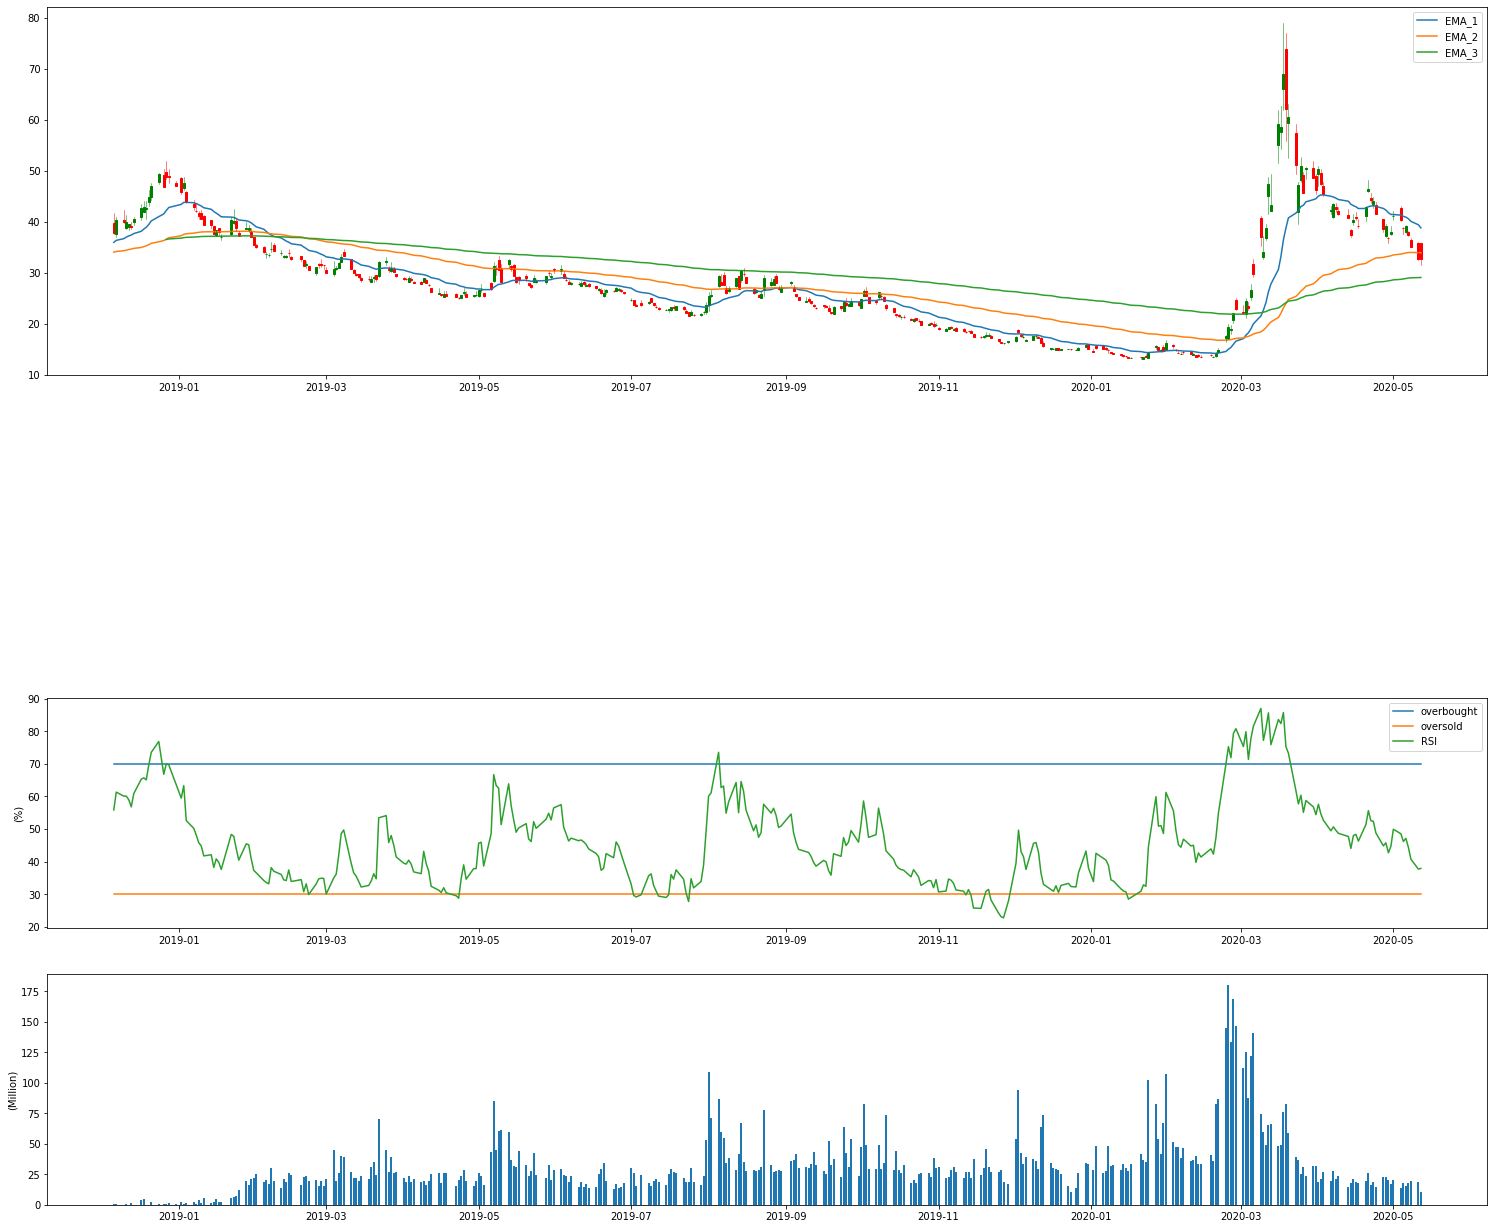

In [4]:
for df in results:
    st.plot_chart(df, 360, 'Ticker')